# Инициализация библиотек


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Парсинг данных

In [0]:
xl = pd.ExcelFile('clean_data_NEW.xlsx')
df = xl.parse('data')
df = df.dropna()

dff = df.loc[df['overall_daily'] == 0.00] #result
df = df.loc[df['overall_daily'] != 0.00]

# Линейная регрессия



In [0]:
X = df[['hh_500', 'value2', 'NEAR_Business_centers', 'NEAR_Malls', 'NEAR_Stations']]
y = df['overall_daily']

In [610]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


В результатах работы мы видим, что коэффициент детерминации = 0.241 - что является очень плоохим показателем

In [611]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          overall_daily   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     12.93
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           8.85e-11
Time:                        09:16:40   Log-Likelihood:                 92.508
No. Observations:                 189   AIC:                            -173.0
Df Residuals:                     183   BIC:                            -153.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.64

# Логистическая регрессия (statsmodels)

Линейная регрессия не сработала, пробуем логистическую. Коэффициент детерминации = - 0.812, что ещё хуже, чем в линейной регрессии.

In [612]:
x1 = X
y1 = y
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.394175
         Iterations 6
                            Results: Logit
Model:                 Logit              Pseudo R-squared:   -0.788  
Dependent Variable:    overall_daily      AIC:                160.9981
Date:                  2019-12-01 09:16   BIC:                180.4486
No. Observations:      189                Log-Likelihood:     -74.499 
Df Model:              5                  LL-Null:            -41.657 
Df Residuals:          183                LLR p-value:        1.0000  
Converged:             1.0000             Scale:              1.0000  
No. Iterations:        6.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                 -6.2343   2.5407 -2.4538 0.0141 -11.2141 -1.2546
hh_

# Random forest

Ниже будет история о том, как мы получили -0.71 % точности



In [613]:
xl = pd.ExcelFile('clean_data_NEW.xlsx')
df = xl.parse('data')
df = df.dropna()

dff = df.loc[df['overall_daily'] == 0.00]
df = df.loc[df['overall_daily'] != 0.00]

print(dff.shape, df.shape)

(228, 11) (189, 11)


In [614]:
import numpy as np
df = df.dropna()
labels = np.array(df['overall_daily'])

dff = dff.dropna()
'''
features_result = dff[['hh_500','value1', 'value2','NEAR_Malls', 'NEAR_Business_centers', 'NEAR_Stations']]
feature_list_result = list(dff.columns)
features_result = np.array(dff)

print(features.shape, features_result.shape)'''

"\nfeatures_result = dff[['hh_500','value1', 'value2','NEAR_Malls', 'NEAR_Business_centers', 'NEAR_Stations']]\nfeature_list_result = list(dff.columns)\nfeatures_result = np.array(dff)\n\nprint(features.shape, features_result.shape)"

In [0]:
from sklearn.model_selection import train_test_split
df = df.drop(['ADDRESS', 'REGION', 'Unnamed: 0', 'overall_daily', 'cashbox_MAX'], axis=1)

train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)

In [631]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [632]:
predictions = rf.predict(test_features)
feature_true = dff[['hh_500','value1', 'value2','NEAR_Malls', 'NEAR_Business_centers', 'NEAR_Stations']]
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

Mean Absolute Error: 0.1149 degrees.


In [633]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

features= dff[['hh_500','value1', 'value2','NEAR_Malls', 'NEAR_Business_centers', 'NEAR_Stations']]
feature_list = list(dff.columns)
features = np.array(dff)

features = np.array(feature_true)
predictions_true = rf.predict(features)

Accuracy: -0.71 %.


# Пробуем все остальные варианты

и получаем 50 % точности


In [0]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import  BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

xl = pd.ExcelFile('clean_data_NEW.xlsx')
df = xl.parse('data')
df = df.dropna()

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM', AdaBoostClassifier()))
#models.append(('NN', MLPClassifier()))

X = df[['hh_500','value1', 'value2', 'NEAR_Business_centers']]

y = df['overall_daily']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [645]:
import warnings
warnings.filterwarnings('ignore')

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=100, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, encoded, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#models[0].fit(X_train, y_train)
#model[0].predict(X_test) 

LR: 0.555000 (0.256098)
LDA: 0.526667 (0.264281)
KNN: 0.518333 (0.269665)
CART: 0.425000 (0.294746)
BNB: 0.553333 (0.255908)
RF: 0.501667 (0.282346)
GBM: 0.526667 (0.264281)


In [646]:
xl = pd.ExcelFile('clean_data_NEW.xlsx')
xl = xl.parse('data')
xl = xl.drop('Unnamed: 0', axis=1)

xl.head(3)

,ADDRESS,REGION,overall_daily,cashbox_MAX,hh_500,value1,value2,NEAR_Malls,NEAR_Business_centers,NEAR_Stations
0,"г.Калуга, Литейная ул., 25/15",Калужская область,0.358696,0.684211,0.787315,0.999901,0.970723,0.0,0.0,1.0
1,"г.Калуга, Гагарина ул., 1",Калужская область,0.000000,0.000000,0.651560,0.996832,0.928817,1.0,1.0,1.0
2,"г.Калуга, Кибальчича ул., 25",Калужская область,0.336957,0.631579,0.568082,1.000000,0.986223,1.0,0.0,0.0


In [647]:
def histogram_intersection(a, b):
  v = np.minimum(a, b).sum().round(decimals=1)
  return v
xl.corr(method=histogram_intersection)

,overall_daily,cashbox_MAX,hh_500,value1,value2,NEAR_Malls,NEAR_Business_centers,NEAR_Stations
overall_daily,1.0,41.6,34.8,41.6,41.5,8.2,2.8,14.4
cashbox_MAX,41.6,1.0,51.7,69.9,69.5,11.2,3.8,23.0
hh_500,34.8,51.7,1.0,108.6,108.2,16.9,7.2,33.5
value1,41.6,69.9,108.6,1.0,336.2,42.7,14.9,98.1
value2,41.5,69.5,108.2,336.2,1.0,36.8,12.6,82.0
NEAR_Malls,8.2,11.2,16.9,42.7,36.8,1.0,6.0,22.0
NEAR_Business_centers,2.8,3.8,7.2,14.9,12.6,6.0,1.0,8.0
NEAR_Stations,14.4,23.0,33.5,98.1,82.0,22.0,8.0,1.0


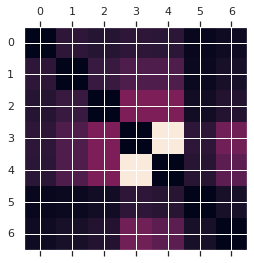

In [656]:
import matplotlib.pyplot as plt

#xl = xl.drop('NEAR_Malls', axis=1)
xl = xl.drop('REGION', axis=1)
xl = xl.drop('ADDRESS', axis=1)
plt.matshow(xl.corr(method=histogram_intersection))
plt.show()

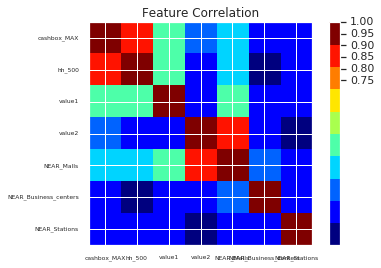

In [657]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 10)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=['overall_daily','cashbox_MAX','hh_500','value1','value2','NEAR_Malls','NEAR_Business_centers','NEAR_Stations']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(xl)

In [659]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

xl.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,overall_daily,cashbox_MAX,hh_500,value1,value2,NEAR_Malls,NEAR_Stations
overall_daily,1,0.86,0.45,0.27,0.4,0.2,0.16
cashbox_MAX,0.86,1,0.47,0.21,0.36,0.14,0.15
hh_500,0.45,0.47,1,0.2,0.45,0.22,0.2
value1,0.27,0.21,0.2,1,0.86,0.15,0.047
value2,0.4,0.36,0.45,0.86,1,0.29,0.2
NEAR_Malls,0.2,0.14,0.22,0.15,0.29,1,0.22
NEAR_Stations,0.16,0.15,0.2,0.047,0.2,0.22,1


# Вывод: самый высокий уровень корреляции среднего кол-ва людей в день с value1, value2, hh_500.